# Load Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data


In [ ]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"

--2024-02-26 17:19:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank-additional.zip’

bank-additional.zip     [  <=>               ] 434.15K  1.40MB/s    in 0.3s    

2024-02-26 17:19:57 (1.40 MB/s) - ‘bank-additional.zip’ saved [444572]



In [ ]:
!unzip '/content/bank-additional.zip'

Archive:  /content/bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/._bank-additional  


In [311]:
#copy for trying
df1 = pd.read_csv('bank-additional/bank-additional-full.csv',sep=';')

df = pd.read_csv('bank-additional/bank-additional-full.csv',sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Data Understanding

In [312]:
#get the values of df
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for col in cat_cols:
    print(f'{col}:')
    print(df[col].unique())
    print('\n')

job:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


marital:
['married' 'single' 'divorced' 'unknown']


education:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


default:
['no' 'unknown' 'yes']


housing:
['no' 'yes' 'unknown']


loan:
['no' 'yes' 'unknown']




In [313]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [314]:
#get common unkown elements
marital_ind = df[df['marital']=='unknown'].index
job_ind = df[df['job']=='unknown'].index
education_ind = df[df['education']=='unknown'].index
default_ind = df[df['default']=='unknown'].index
housing_ind = df[df['housing']=='unknown'].index
loan_ind = df[df['loan']=='unknown'].index
common_elements = set(marital_ind).intersection(job_ind,education_ind,default_ind)
common_elements = list(common_elements)
common_elements

[17344, 17421]

In [315]:
df.iloc[17344]

age                        49
job                   unknown
marital               unknown
education             unknown
default               unknown
housing                   yes
loan                      yes
contact              cellular
month                     jul
day_of_week               mon
duration                   49
campaign                    9
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.4
cons.price.idx         93.918
cons.conf.idx           -42.7
euribor3m               4.962
nr.employed            5228.1
y                          no
Name: 17344, dtype: object

we have common unkown values, lets drop them


# Data Cleaning


## Handling missing values
We can check for null values using .isnull() and fill them in using .fillna()

In [316]:
df.drop(common_elements,inplace = True)

In [127]:
df.isnull().sum().sum()

0

## Removing duplicates
We can use .drop_duplicates()

In [317]:
df.drop_duplicates(inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Quick View for the the data
We can use .describe() and .info()

In [318]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000
mean,40.023219,258.321586,2.567761,962.463035,0.173022,0.081857,93.575703,-40.502757,3.621228,5167.031904
std,10.420578,259.309529,2.770193,186.941469,0.494975,1.570894,0.578848,4.627947,1.734454,72.251865
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [319]:
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41174,41174,41174,41174,41174,41174,41174,41174,41174,41174,41174
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21569,33937,26133,13767,8618,35549,36535


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41174 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41174 non-null  int64  
 1   job             41174 non-null  object 
 2   marital         41174 non-null  object 
 3   education       41174 non-null  object 
 4   default         41174 non-null  object 
 5   housing         41174 non-null  object 
 6   loan            41174 non-null  object 
 7   contact         41174 non-null  object 
 8   month           41174 non-null  object 
 9   day_of_week     41174 non-null  object 
 10  duration        41174 non-null  int64  
 11  campaign        41174 non-null  int64  
 12  pdays           41174 non-null  int64  
 13  previous        41174 non-null  int64  
 14  poutcome        41174 non-null  object 
 15  emp.var.rate    41174 non-null  float64
 16  cons.price.idx  41174 non-null  float64
 17  cons.conf.idx   41174 non-null 

In [321]:
df['pdays'].value_counts()

999    39659
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [322]:
#got '999' 39661 times ; (999 means client was not previously contacted) lets replace it to 28 because biggest num in data is 27 so 28 to avoid outliers
df['pdays'].replace(28,0,inplace = True)

## Check for outliers
You can use box plots, histograms, and z-scores to find outliers.

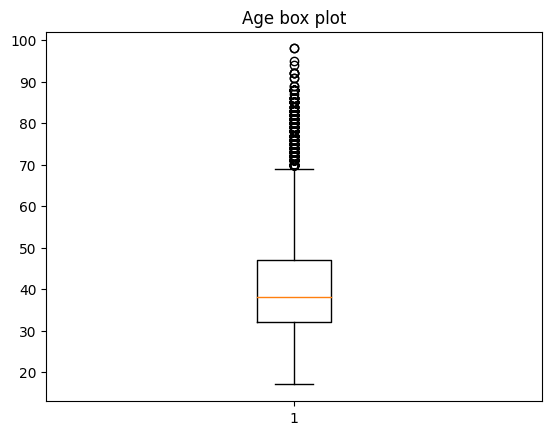

In [323]:
plt.boxplot(df['age'])
plt.title('Age box plot')
plt.show()

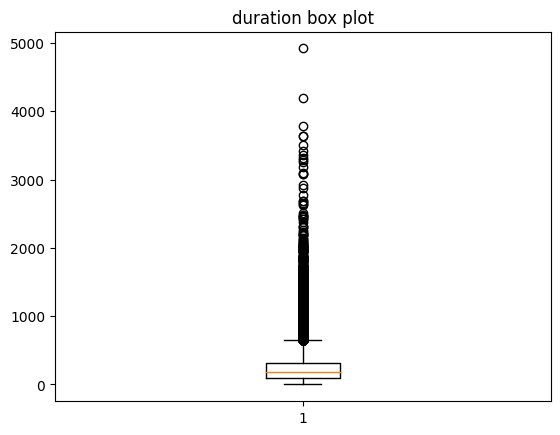

In [324]:
plt.boxplot(df['duration'])
plt.title('duration box plot')
plt.show()

## Converting data types
Using .astype()

In [ ]:
#doesn't need

## Fix inconsistent data
Look for inconsistencies in the data, like spelling variations, different

In [325]:
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["age"] >= lower_bound) & (df["age"] <= upper_bound)]

In [326]:
Q1 = df["duration"].quantile(0.25)
Q3 = df["duration"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["duration"] >= lower_bound) & (df["duration"] <= upper_bound)]

# Data Preprocessing


## Renaming columns
Using .rename()

In [328]:
#looping in columns and rename
df = df.rename(columns=lambda x: x.replace('.', '_'))
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


## Changing column order
Using .reindex()


In [ ]:
#doesn't need

## Dropping unnecessary columns
 Use .drop() in pandas.

In [329]:
df.corr()

<ipython-input-329-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
age,1.000000,0.003975,0.015394,0.002819,-0.020876,0.073321,0.038486,0.103659,0.086461,0.070936
duration,0.003975,1.000000,-0.126266,-0.074917,0.049621,-0.059395,-0.006660,0.003468,-0.065778,-0.085974
campaign,0.015394,-0.126266,1.000000,0.050591,-0.079423,0.148069,0.127019,-0.011818,0.132417,0.142474
pdays,0.002819,-0.074917,0.050591,1.000000,-0.573859,0.265096,0.079328,-0.087106,0.289685,0.366245
previous,-0.020876,0.049621,-0.079423,-0.573859,1.000000,-0.422722,-0.212904,-0.064456,-0.454664,-0.500601
emp_var_rate,0.073321,-0.059395,0.148069,0.265096,-0.422722,1.000000,0.777748,0.227759,0.972818,0.908985
cons_price_idx,0.038486,-0.006660,0.127019,0.079328,-0.212904,0.777748,1.000000,0.081356,0.694953,0.532457
cons_conf_idx,0.103659,0.003468,-0.011818,-0.087106,-0.064456,0.227759,0.081356,1.000000,0.306775,0.129394
euribor3m,0.086461,-0.065778,0.132417,0.289685,-0.454664,0.972818,0.694953,0.306775,1.000000,0.945386
nr_employed,0.070936,-0.085974,0.142474,0.366245,-0.500601,0.908985,0.532457,0.129394,0.945386,1.000000


<ipython-input-330-8264f6ae2167>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True,cmap='coolwarm',fmt='.2f')


<Axes: >

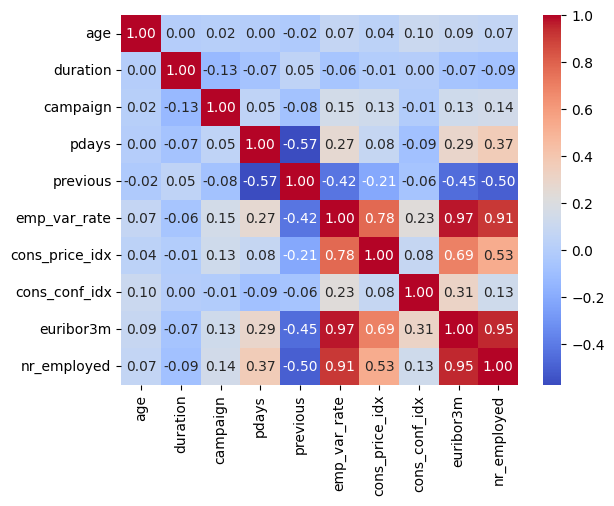

In [330]:
sns.heatmap(df.corr(),annot = True,cmap='coolwarm',fmt='.2f')

In [331]:
# got 2 columns correlated so let drop them
df.drop(['nr_employed','euribor3m'],axis = 1 , inplace = True)

<ipython-input-332-8264f6ae2167>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True,cmap='coolwarm',fmt='.2f')


<Axes: >

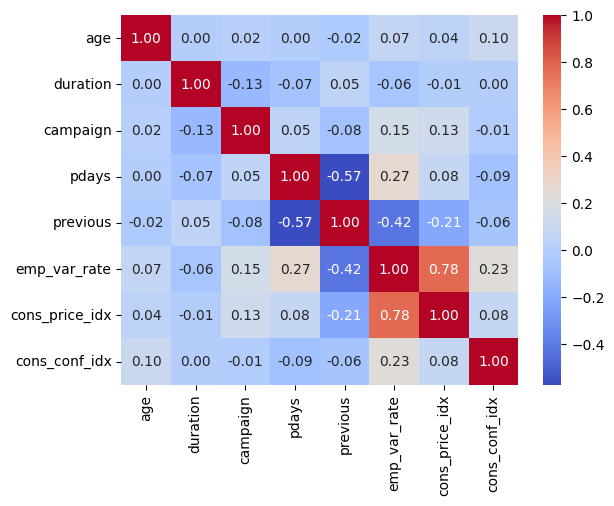

In [332]:
sns.heatmap(df.corr(),annot = True,cmap='coolwarm',fmt='.2f')

## Encoding categorical variables


In [333]:
#encode the target to 0,1
df.loc[df['y'] == 'no', 'y'] = 0
df.loc[df['y'] == 'yes', 'y'] = 1

In [282]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,0


# Data Visualization


##Histograms
Use .hist() in pandas to get a visual representation of the distribution of a numeric variable. This can reveal outliers, skewness, and other patterns.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp_var_rate'}>],
       [<Axes: title={'center': 'cons_price_idx'}>,
        <Axes: title={'center': 'cons_conf_idx'}>, <Axes: >]],
      dtype=object)

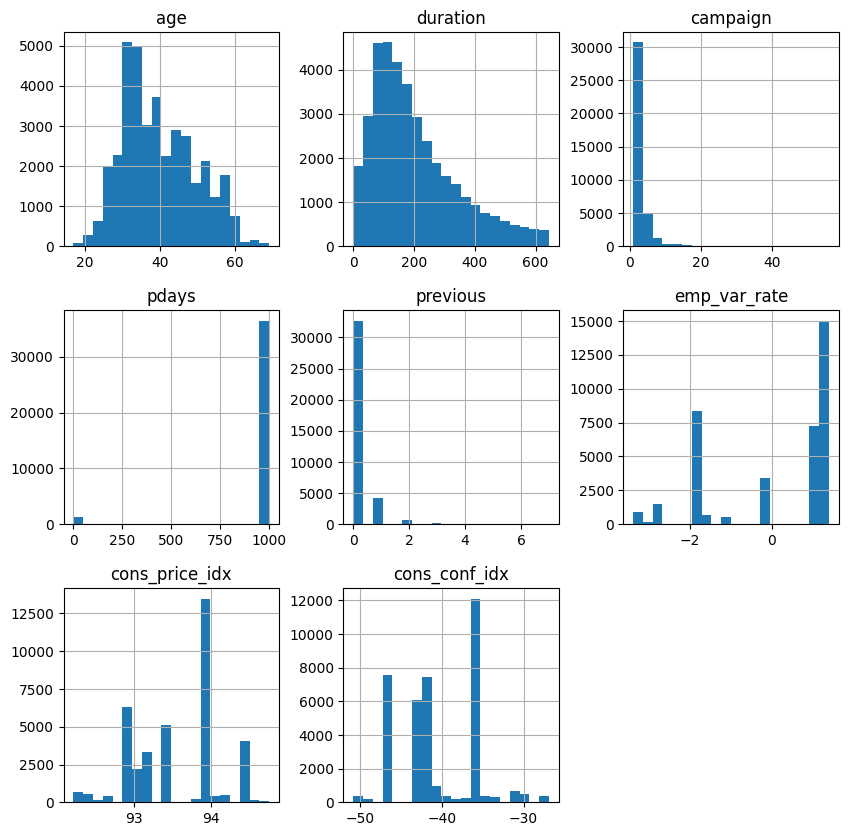

In [344]:
df.hist(bins=20,figsize=(10, 10))

## Box plots
Use .boxplot() in pandas to visualize the distribution through quartiles, extremes, and outliers for a numeric variable.

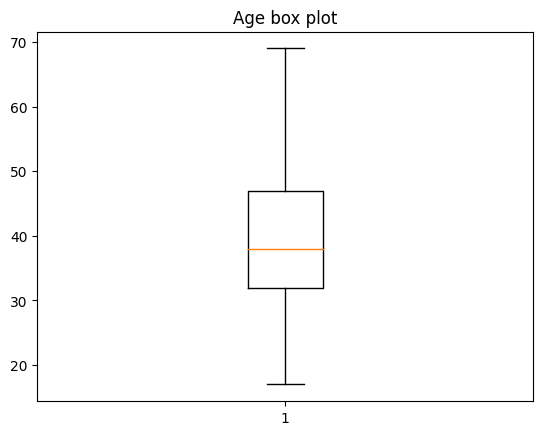

In [335]:
plt.boxplot(df['age'])
plt.title('Age box plot')
plt.show()

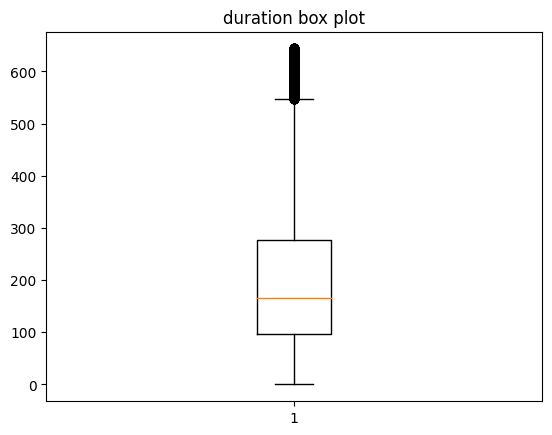

In [334]:
plt.boxplot(df['duration'])
plt.title('duration box plot')
plt.show()

In [347]:
Q1 = df["duration"].quantile(0.25)
Q3 = df["duration"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["duration"] >= lower_bound) & (df["duration"] <= upper_bound)]

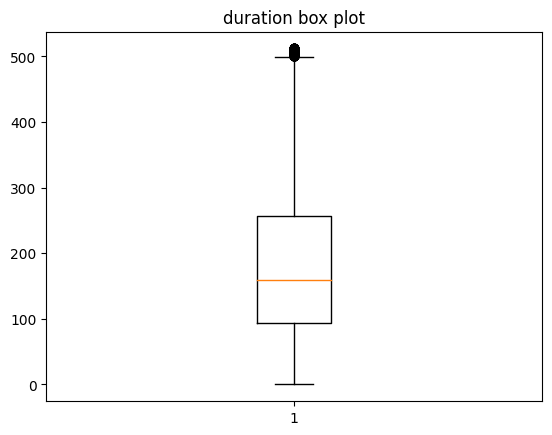

In [348]:
plt.boxplot(df['duration'])
plt.title('duration box plot')
plt.show()

In [354]:
df.shape

(36037, 19)

## Scatter plots
Use .plot(kind=’scatter’) to visualize the relationship between two numeric variables. This can reveal correlations, clusters, and outliers.

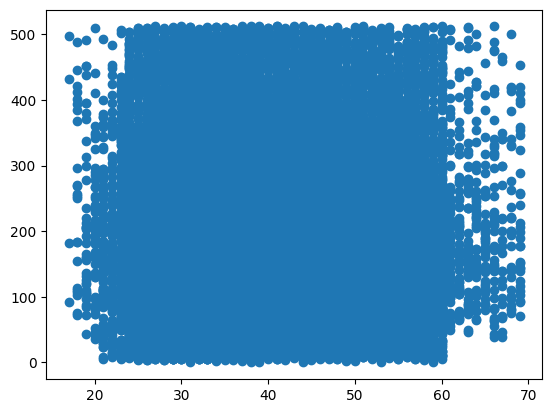

In [355]:
plt.scatter(df['age'],df['duration'])

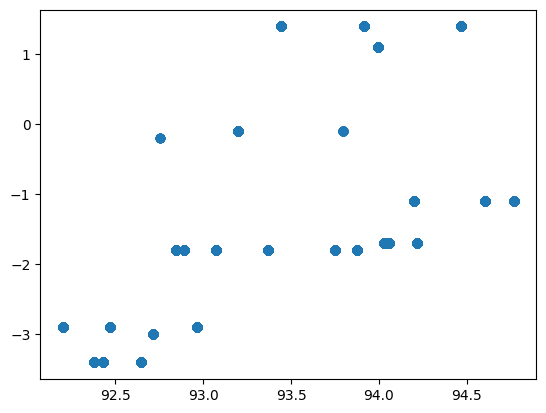

In [356]:
plt.scatter(df['cons_price_idx'],df['emp_var_rate'])

## Bar plots
Use .plot(kind=’bar’) to compare categorical variables or the counts of categorical variables. This gives a quick visual summary.

Text(0.5, 1.0, 'marital')

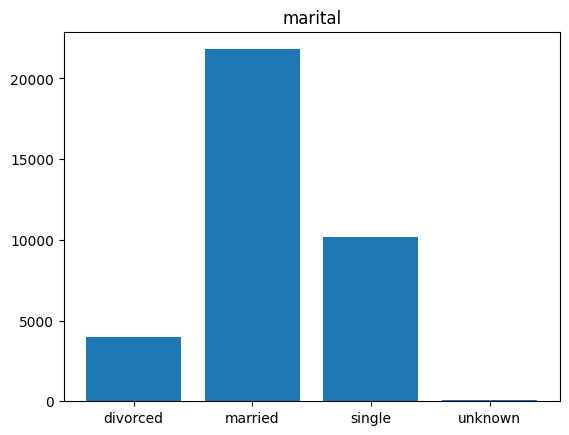

In [357]:
grouped_df = df.groupby('marital').size().reset_index(name ='Count')
plt.bar(grouped_df['marital'],grouped_df['Count'])
plt.title('marital')

Text(0.5, 1.0, 'age')

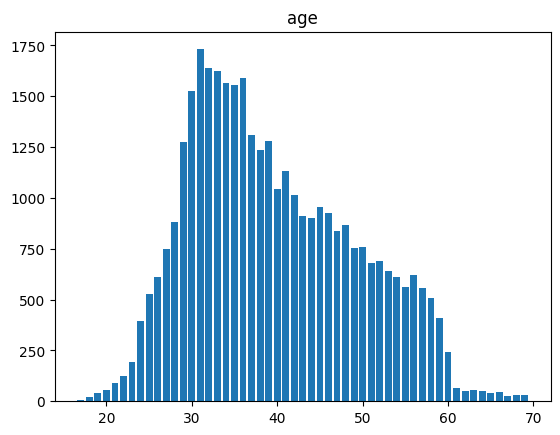

In [358]:
grouped_df = df.groupby('age').size().reset_index(name ='Count')
plt.bar(grouped_df['age'],grouped_df['Count'])
plt.title('age')

Text(0.5, 1.0, 'contact')

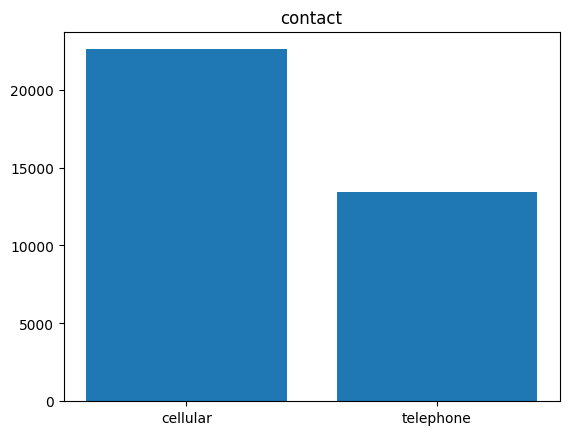

In [359]:
grouped_df = df.groupby('contact').size().reset_index(name = 'Count')
plt.bar(grouped_df['contact'],grouped_df['Count'])
plt.title('contact')

Text(0.5, 1.0, 'months')

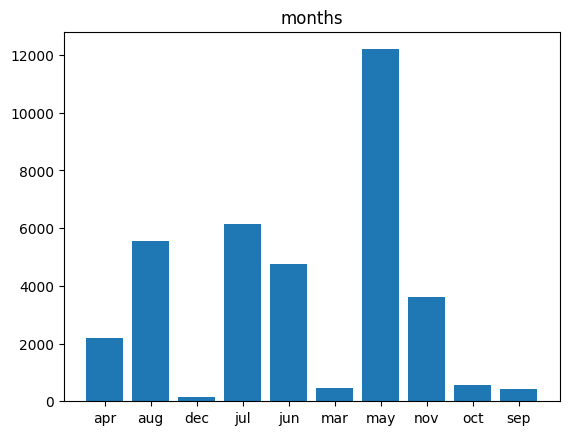

In [360]:
grouped_df = df.groupby('month').size().reset_index(name = 'Count')
plt.bar(grouped_df['month'],grouped_df['Count'])
plt.title('months')

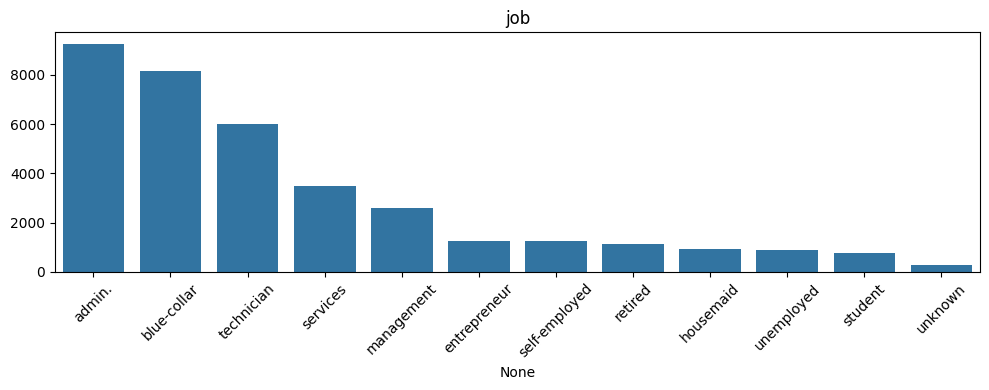

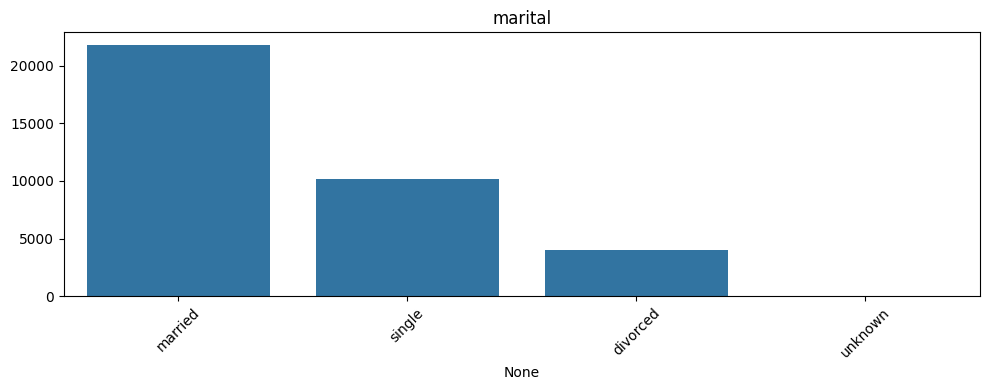

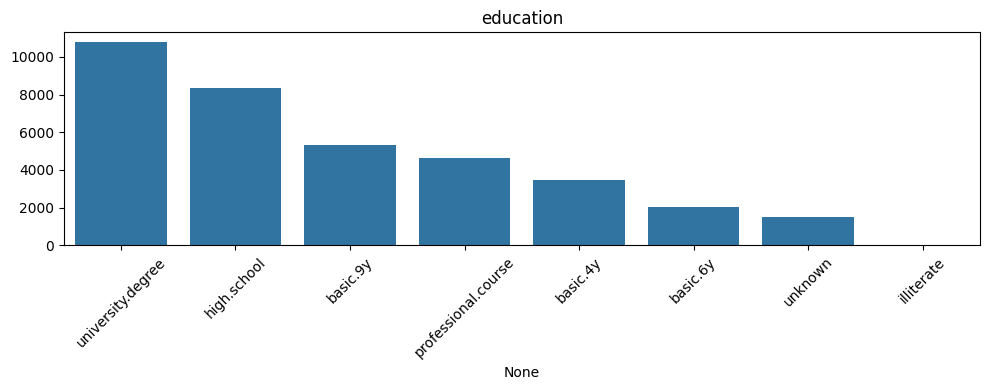

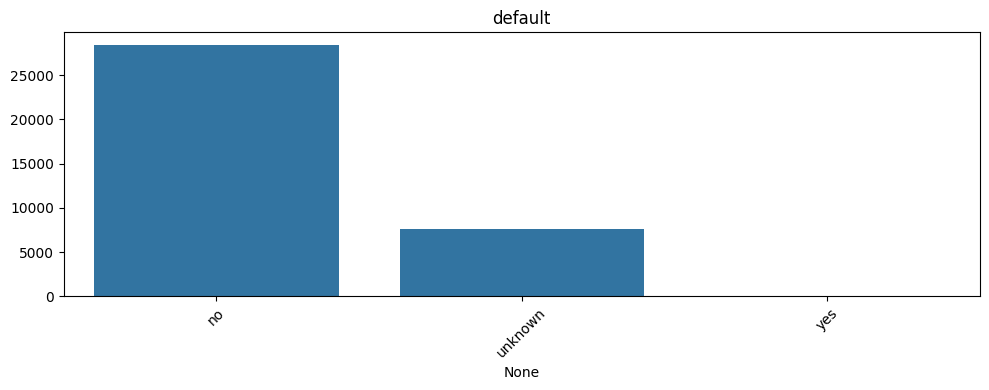

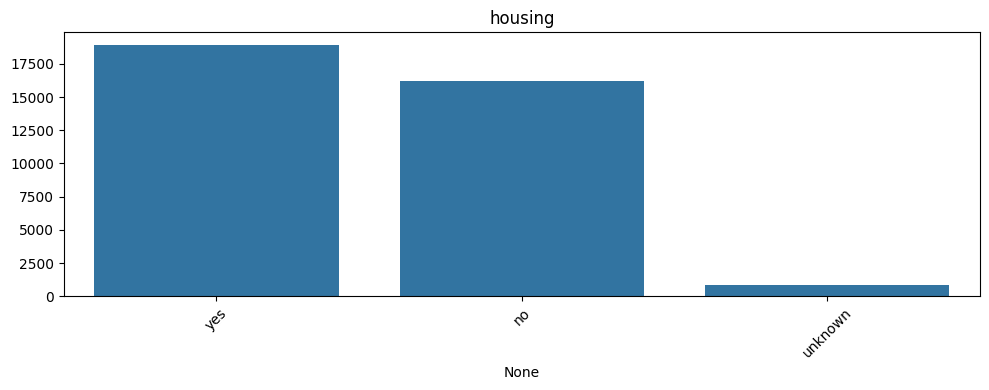

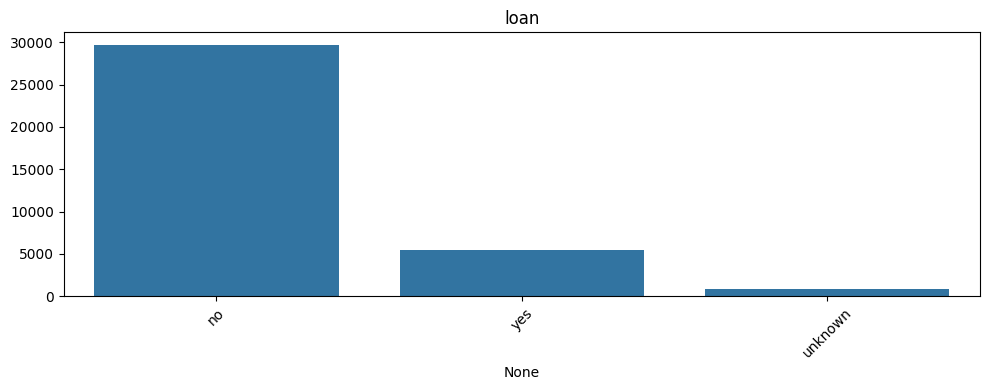

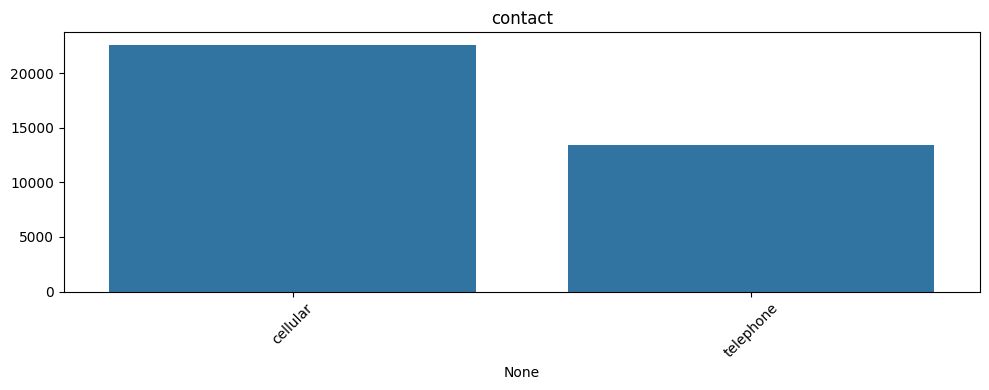

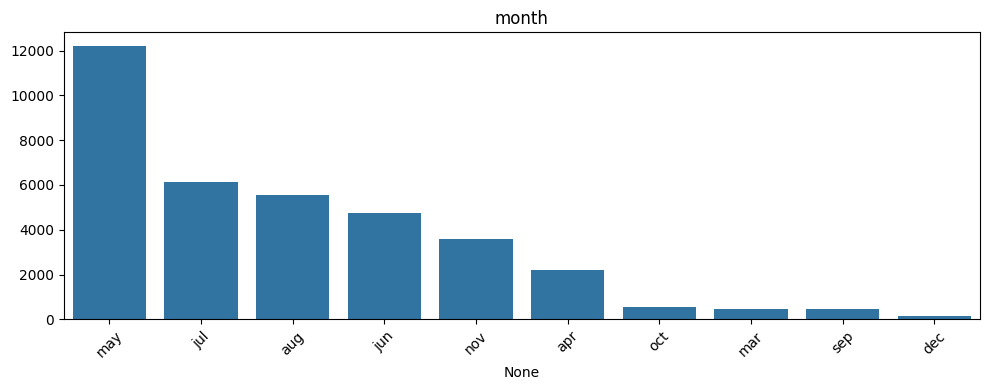

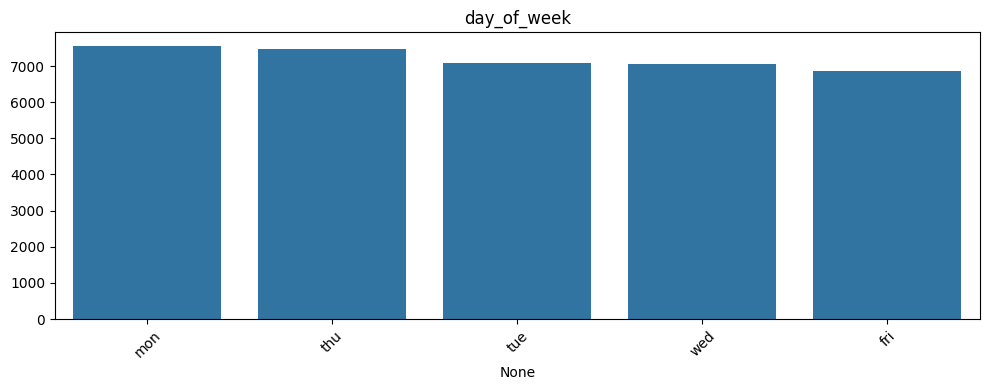

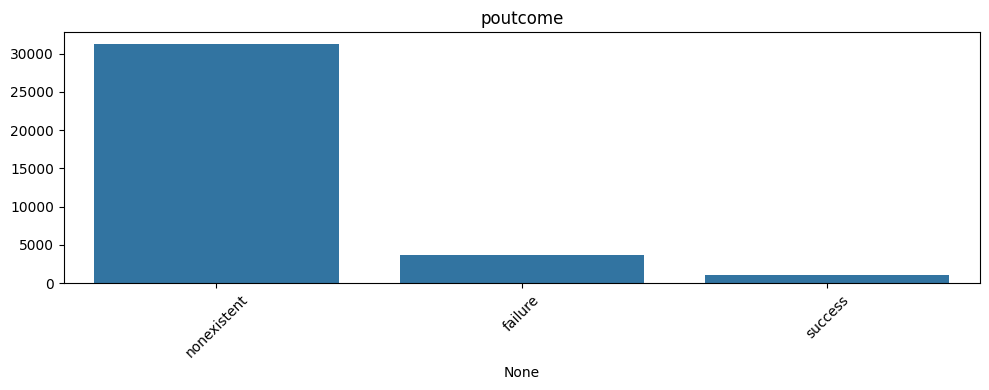

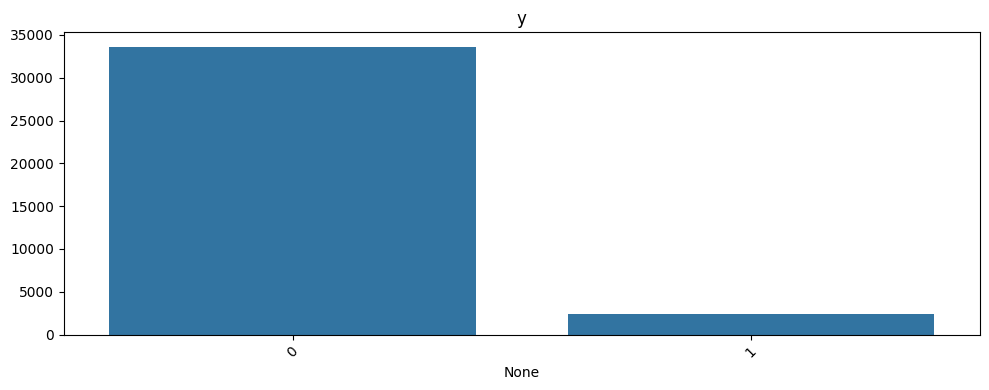

In [361]:
# visualize caregorical data in loop
categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
                         'month', 'day_of_week', 'poutcome', 'y']
for col in categorical_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.tight_layout()

plt.show()

## Encoding categorical variables


In [362]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,0


In [369]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_encoded = df
# Encode the 'Category' column
df_encoded['job'] = label_encoder.fit_transform(df_encoded['job'])
df_encoded['marital'] = label_encoder.fit_transform(df_encoded['marital'])
df_encoded['education'] = label_encoder.fit_transform(df_encoded['education'])
df_encoded['default'] = label_encoder.fit_transform(df_encoded['default'])
df_encoded['housing'] = label_encoder.fit_transform(df_encoded['housing'])
df_encoded['loan'] = label_encoder.fit_transform(df_encoded['loan'])
df_encoded['contact'] = label_encoder.fit_transform(df_encoded['contact'])
df_encoded['month'] = label_encoder.fit_transform(df_encoded['month'])
df_encoded['day_of_week'] = label_encoder.fit_transform(df_encoded['day_of_week'])
df_encoded['poutcome'] = label_encoder.fit_transform(df_encoded['poutcome'])

df_encoded.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,0
